# Week5: Assignments
### Author: Ganesh Kale

import required packages

In [22]:
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Assignment 5.1: Classifying movie reviews: A binary classification example

In [4]:
# load the data

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
# display train and test data sample

print(train_data[0])
train_labels[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

### Encoding the integer sequences into a binary matrix

In [7]:
#  create function to encode sequence

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# display sample of training data after encoding

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# vectorize the lables

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Build the NN Model

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compile the model

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Splitting data into training and validation

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Train the model

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5145 - accuracy: 0.7843 - val_loss: 0.4133 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3061 - accuracy: 0.8999 - val_loss: 0.3046 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2234 - accuracy: 0.9269 - val_loss: 0.2809 - val_accuracy: 0.8907
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1788 - accuracy: 0.9412 - val_loss: 0.2736 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1431 - accuracy: 0.9551 - val_loss: 0.2816 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1169 - accuracy: 0.9638 - val_loss: 0.3234 - val_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0989 - accuracy: 0.9711 - val_loss: 0.3150 - val_accuracy: 0.8816
Epoch 8/20
30

In [16]:
#  see the training history

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

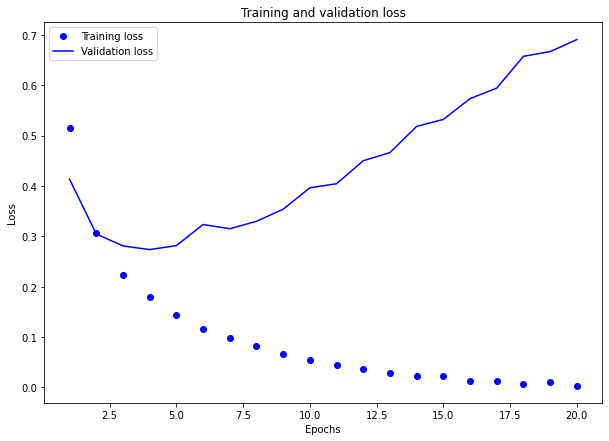

In [20]:
plt.figure(figsize=(10,7))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show();

#### Plotting the training and validation accuracy

<Figure size 432x288 with 0 Axes>

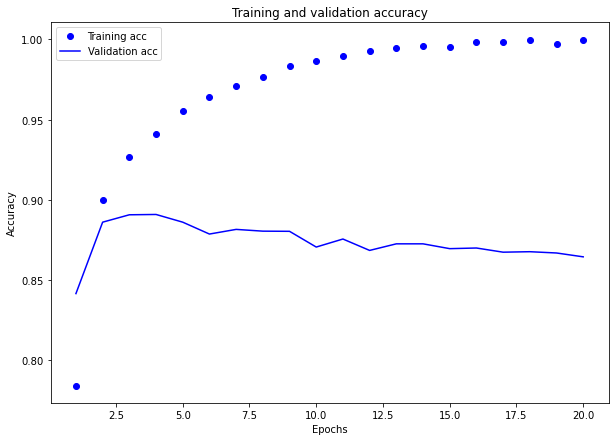

In [22]:
plt.clf()

plt.figure(figsize=(10,7))

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

#### Retraining a model from scratch - for 4 epochs

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.5049 - accuracy: 0.7966
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2975 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2170 - accuracy: 0.9286
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1783 - accuracy: 0.9394


782/782 [==============================] - 2s 2ms/step - loss: 0.3007 - accuracy: 0.8813


In [25]:
# display the result

results

[0.3007475733757019, 0.8813199996948242]

In [26]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 88.0%


### END

# Assignment 5.2: Classifying newswires: A multiclass classification example

In [8]:
# loading the Reuters dataset

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [9]:
# display  records in each data set train and test

len(train_data)
len(test_data)

8982

2246

In [11]:
# display train data sample

print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [12]:
# Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_newswire

557056/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
# label associated with an example is an integer between 0 and 45

train_labels[10]

3

Encoding the input data

In [18]:
 def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Encoding the labels

In [20]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [23]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Building your model

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Compiling the model

In [26]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [28]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.6546 - accuracy: 0.5004 - val_loss: 1.7578 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4382 - accuracy: 0.7015 - val_loss: 1.3042 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0600 - accuracy: 0.7776 - val_loss: 1.1244 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8344 - accuracy: 0.8217 - val_loss: 1.0341 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6638 - accuracy: 0.8602 - val_loss: 0.9458 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5292 - accuracy: 0.8910 - val_loss: 0.8961 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4262 - accuracy: 0.9137 - val_loss: 0.8996 - val_accuracy: 0.8090
Epoch 8/20
16

Plotting the training and validation loss

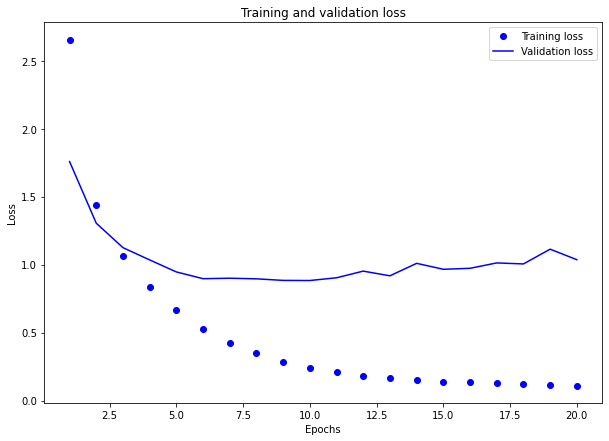

In [30]:
plt.figure(figsize=(10,7))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show();

Plotting the training and validation accuracy

<Figure size 432x288 with 0 Axes>

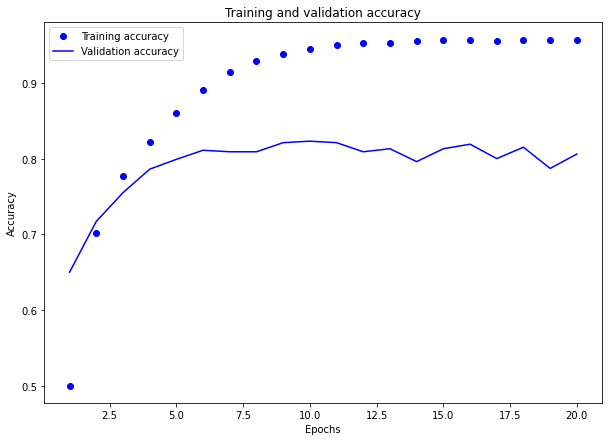

In [31]:
plt.clf()

plt.figure(figsize=(10,7))

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

Retraining a model from scratch

In [32]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 16ms/step - loss: 2.6042 - accuracy: 0.4963
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4033 - accuracy: 0.7088
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 1.0273 - accuracy: 0.7808
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7990 - accuracy: 0.8292
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.6345 - accuracy: 0.8661
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5035 - accuracy: 0.8965
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4030 - accuracy: 0.9144
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3334 - accuracy: 0.9259
Epoch 9/9
18/18 [==============================] - 0s 15ms/step - loss: 0.2758 - accuracy: 0.9378


71/71 [==============================] - 0s 2ms/step - loss: 0.9557 - accuracy: 0.7907


In [33]:
# display the result

results

[0.9557026028633118, 0.790739119052887]

In [34]:
print(f"The accuracy of the model is {round(results[1],2)*100}%")

The accuracy of the model is 79.0%


predictions on new data

In [35]:
# predictions is a vector of length 46

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [36]:
# The coefficients in this vector sum to 1

np.sum(predictions[0])

0.99999994

In [37]:
# the class with the highest probability

np.argmax(predictions[0])

3

different way to handle the labels and the loss

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

importance of having sufficiently large intermediate layers

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 3.0746 - accuracy: 0.2279 - val_loss: 2.5696 - val_accuracy: 0.2740
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.9711 - accuracy: 0.5382 - val_loss: 1.6253 - val_accuracy: 0.6230
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.4587 - accuracy: 0.6419 - val_loss: 1.4765 - val_accuracy: 0.6360
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2913 - accuracy: 0.6704 - val_loss: 1.4255 - val_accuracy: 0.6600
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1830 - accuracy: 0.7005 - val_loss: 1.4011 - val_accuracy: 0.6620
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0987 - accuracy: 0.7076 - val_loss: 1.3835 - val_accuracy: 0.6610
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0299 - accuracy: 0.7103 - val_loss: 1.4036 - val_accuracy: 0.6570
Epoch 8/20
63/63 [=

# END

# Assignment 5.3:Predicting house prices: A regression example

In [41]:
# Loading the Boston housing dataset


from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [42]:
# display shape of datset


train_data.shape
test_data.shape

(404, 13)

(102, 13)

In [44]:
# display targets - sample

train_targets[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

Normalizing the data

In [45]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Building the model

In [46]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

Validating approach using K-fold validation

In [47]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0


Processing fold #1


Processing fold #2


Processing fold #3


In [48]:
all_scores

[1.9127342700958252,
 2.2901790142059326,
 2.5055272579193115,
 2.2678756713867188]

In [49]:
np.mean(all_scores)

2.244079053401947

Saving the validation logs at each fold

In [50]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Building the history of successive mean K-fold validation scores

In [51]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
p

Plotting validation scores

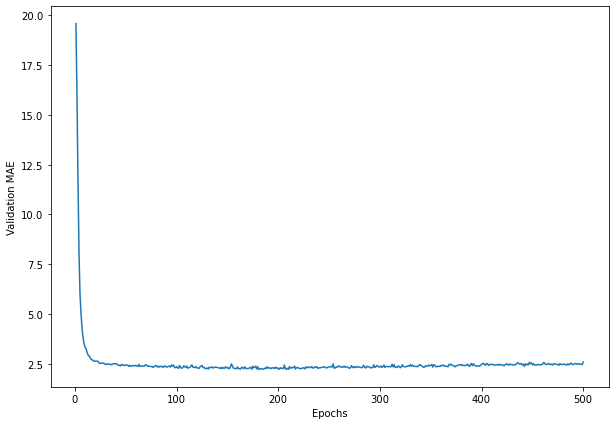

In [54]:
plt.figure(figsize=(10,7))

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show();

Plotting validation scores, excluding the first 10 data points

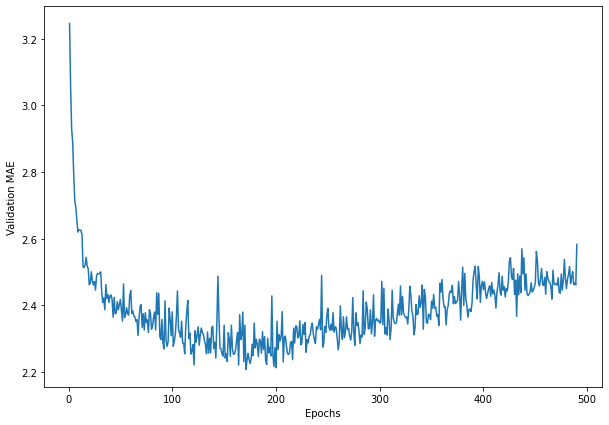

In [56]:
truncated_mae_history = average_mae_history[10:]
plt.figure(figsize=(10,7))

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show();

In [62]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

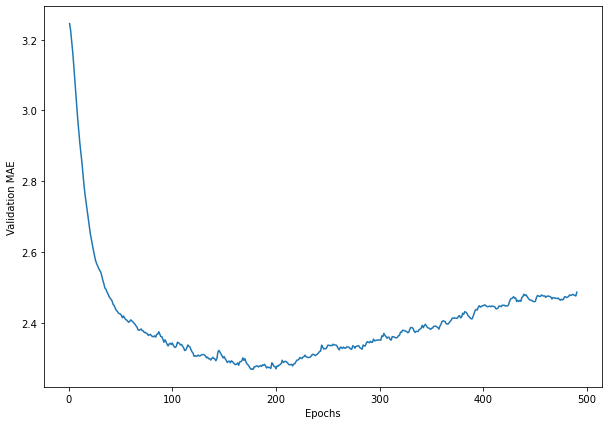

In [64]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.figure(figsize=(10,7))

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show();

Training the final model

In [57]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 13.5448 - mae: 2.4619


In [58]:
test_mae_score

2.461940288543701

predictions on new data

In [59]:
predictions = model.predict(test_data)
predictions[0]

array([7.760147], dtype=float32)

# END